In [10]:
import uproot
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import math
from scipy.fft import fft, fftfreq
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import os
from plotly.subplots import make_subplots
from plotly import tools
import plotly.offline as pyo
import sys

In [11]:
Run_num = '11552'
#files =uproot.open(f"/Users/danielcarber/Documents/SBND/Noise Analysis/noise_output_run{Run_num}.root")
files =uproot.open(f"/Users/danielcarber/Documents/SBND/Noise Analysis/data/noise_output_coh.root")
files['tpc_noise;1'].keys()

['raw_rms', 'coh_wave', 'int_rms']

In [12]:
raw_rms = files['tpc_noise;1']['int_rms'].array().to_list()
Noise_df = {'Channel_id':[],'Raw_rms':[],'wire_plane':[]}
for r,rms in enumerate(raw_rms):
    Noise_df['Channel_id'].append(r)
    Noise_df['Raw_rms'].append(rms)
    if r <1984:
        Noise_df['wire_plane'].append('UB')
    elif r<3968:
        Noise_df['wire_plane'].append('VB')
    elif r<5632:
        Noise_df['wire_plane'].append('YB')
    elif r<7616:
        Noise_df['wire_plane'].append('UA')
    elif r<9600:
        Noise_df['wire_plane'].append('VA')
    elif r<11264:
        Noise_df['wire_plane'].append('YA')
    else:
        Noise_df['wire_plane'].append(None)

Noise_df = pd.DataFrame(Noise_df)


In [13]:
int_rms = files['tpc_noise;1']['int_rms'].array().to_list()
print(len(raw_rms))
#Noise_df['wire_plane'][0:1969] = ['U1']*1968
#Noise_df['wire_plane'][1969:3936] = ['V1']*1968
#Noise_df['wire_plane'][3936:5631] = ['Y1']*1694
#Noise_df['wire_plane'][5632:7600] = ['U2']*1968
#Noise_df['wire_plane'][7600:9599] = ['V2']*1968
#Noise_df['wire_plane'][9599:] = ['Y2']*1694
#mask = (Noise_df['Raw_rms'] >3) & (Noise_df['wire_plane'] == 'YB')

#print(Noise_df[mask].to_string())

11264


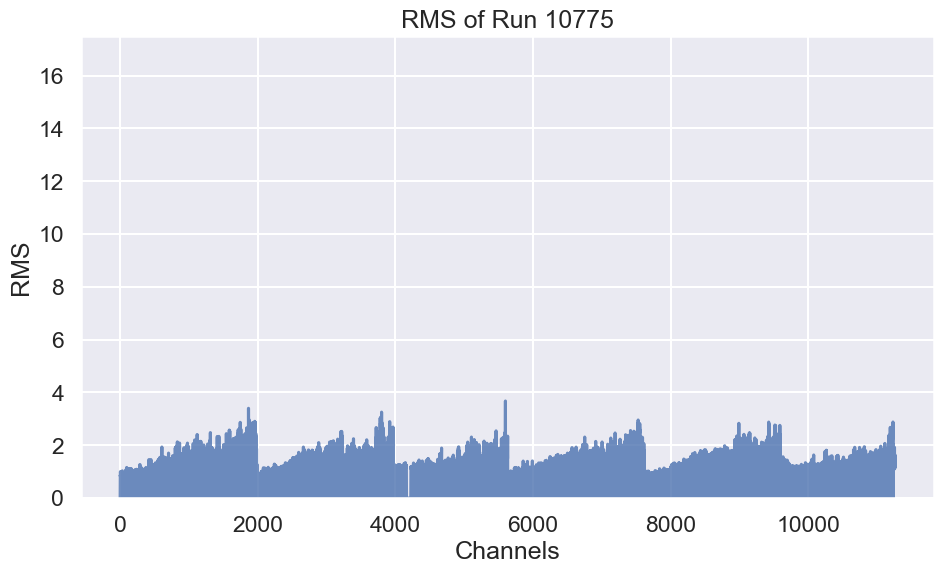

In [14]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')
#plt.plot(range(len(ADC_array[0][0])),ADC_array[0][4231])
#plt.hist(signal_diff_coll,range = [0,300],bins = 100, label = "Coll")
#plt.hist(signal_diff_ind_1,range = [0,300],bins = 100,alpha = .6, label = "Ind 1")
#plt.hist(signal_diff_ind_2,range = [0,300],bins = 100, alpha = .2,label = "Ind 2")
#plt.scatter(df['channel_id'],df['raw_rms'],alpha = 1, label = "RMS before shift",s = 10)
#plt.scatter(df_2['channel_id'],df_2['raw_rms'],alpha = 1, label = "RMS after shift",s = 10)
plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")

#plt.hist(df['Time_diff'], range=[0, 2000],bins=50,alpha =1, label = "Time difference")
#plt.hist(selection['reco_dedx'][ep_mask_e], range=[0, 10], alpha = .4,bins=50,label = "Reco Electrons")
plt.ylim(0,17.5)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("RMS of Run 10775")
plt.show()
#plt.savefig('dedx_4000_events.png')

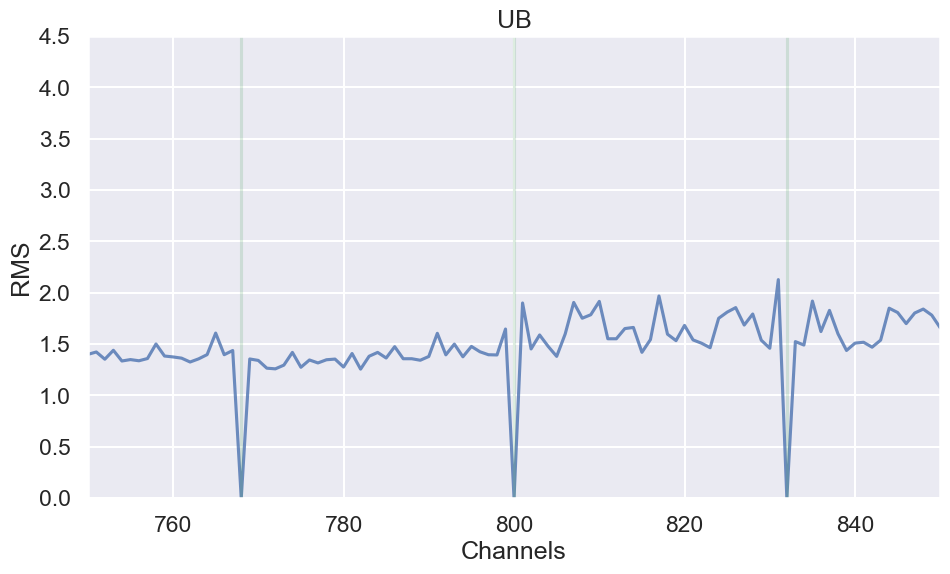

In [15]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')

plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")
for i in range(0,1984,32):
    plt.axvline(i,alpha = .2,color = 'g')
plt.ylim(0,4.5)
plt.xlim(0,1983)
plt.xlim(750,850)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("UB")
plt.show()
#plt.savefig('dedx_4000_events.png')

In [16]:


directory = f"/Users/danielcarber/Documents/SBND/Noise Analysis/Plots/run{Run_num}/"
if not os.path.exists(directory):
    os.mkdir(directory)

In [17]:
#import plotly.io as pio
#pio.kaleido.scope.default_format = "png"

filename = f"RMS_plots_planeB_coh_test.pdf"

fig = make_subplots(rows=3,cols=2,column_widths = [0.7,0.3],subplot_titles = (f'UB Channel RMS Run {Run_num}','UB RMS',f'VB Channel RMS Run {Run_num}','VB RMS',f'YB Channel RMS Run {Run_num}','YB RMS',))
mask = Noise_df['wire_plane'] == 'UB'
median = np.median(Noise_df['Raw_rms'][mask])
mean = np.mean(Noise_df['Raw_rms'][mask])
fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'red',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 1, col =2)
fig.add_trace(go.Scatter(x=Noise_df['Channel_id'][mask],y = Noise_df['Raw_rms'][mask],marker_color = 'red'),row = 1, col = 1)
fig.update_layout(xaxis2 = dict(range = [0,median+5]))
fig.update_layout(margin = dict(r=200))
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=120,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=110,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)


mask = Noise_df['wire_plane'] == 'VB'
median = np.median(Noise_df['Raw_rms'][mask])
fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'purple',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 2, col =2)
fig.add_trace(go.Scatter(x=Noise_df['Channel_id'][mask],y = Noise_df['Raw_rms'][mask],marker_color = 'purple'),row = 2, col = 1)
fig.update_layout(xaxis4 = dict(range = [0,median+5]))

fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-120,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-130,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)

mask = Noise_df['wire_plane'] == 'YB'
median = np.median(Noise_df['Raw_rms'][mask])
fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'blue',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 3, col =2)
fig.add_trace(go.Scatter(x=Noise_df['Channel_id'][mask],y = Noise_df['Raw_rms'][mask],marker_color = 'blue'),row = 3, col = 1)
fig.update_layout(xaxis6 = dict(range = [0,median+5]))

fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-370,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-380,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)

fig.update_yaxes(title_text = "RMS [ADC]",row = 1, col = 1)
fig.update_yaxes(title_text = "RMS [ADC]",row = 2, col = 1)
fig.update_yaxes(title_text = "RMS [ADC]",row = 3, col = 1)
fig.update_xaxes(title_text = "Channel #",row = 1, col = 1)
fig.update_xaxes(title_text = "Channel #",row = 2, col = 1)
fig.update_xaxes(title_text = "Channel #",row = 3, col = 1)
fig.update_xaxes(title_text = "RMS [ADC]",row = 1, col = 2)
fig.update_xaxes(title_text = "RMS [ADC]",row = 2, col = 2)
fig.update_xaxes(title_text = "RMS [ADC]",row = 3, col = 2)
#fig.update_layout(xaxis2 = dict(range = [0,5]),xaxis4 = dict(range = [0,5]),xaxis6 = dict(range = [0,5]))
#fig.update_layout(yaxis = dict(range = [0,5]),yaxis3 = dict(range = [0,5]),yaxis5 = dict(range = [0,5]))
fig.update_layout(xaxis = dict(tickmode = 'linear',dtick = 64),xaxis3 = dict(tickmode = 'linear',dtick = 64),xaxis5 = dict(tickmode = 'linear',dtick = 64))
fig.update_layout(height = 800, width = 1200,showlegend = False)

fig.write_image(directory+filename)
fig.show()

In [ ]:

filename = f"RMS_plots_planeA_coh_test.pdf"

fig = make_subplots(rows=3,cols=2,column_widths = [0.7,0.3],subplot_titles = (f'UA Channel RMS Run {Run_num}','UA RMS',f'VA Channel RMS Run {Run_num}','VA RMS',f'YA Channel RMS Run {Run_num}','YA RMS',))
mask = Noise_df['wire_plane'] == 'UA'
median = np.median(Noise_df['Raw_rms'][mask])
mean = np.mean(Noise_df['Raw_rms'][mask])
fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'red',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 1, col =2)
fig.add_trace(go.Scatter(x=Noise_df['Channel_id'][mask],y = Noise_df['Raw_rms'][mask],marker_color = 'red'),row = 1, col = 1)
fig.update_layout(xaxis2 = dict(range = [0,median+5]))
fig.update_layout(margin = dict(r=200))
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=60,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=50,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)


mask = Noise_df['wire_plane'] == 'VA'
median = np.median(Noise_df['Raw_rms'][mask])
fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'purple',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 2, col =2)
fig.add_trace(go.Scatter(x=Noise_df['Channel_id'][mask],y = Noise_df['Raw_rms'][mask],marker_color = 'purple'),row = 2, col = 1)
fig.update_layout(xaxis4 = dict(range = [0,median+5]))

fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-180,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-190,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)

mask = Noise_df['wire_plane'] == 'YA'
median = np.median(Noise_df['Raw_rms'][mask])
fig.add_trace(go.Histogram(x=Noise_df['Raw_rms'][mask],marker_color = 'blue',xbins=dict(start = median - 5,end = median+5,size=.05)),row = 3, col =2)
fig.add_trace(go.Scatter(x=Noise_df['Channel_id'][mask],y = Noise_df['Raw_rms'][mask],marker_color = 'blue'),row = 3, col = 1)
fig.update_layout(xaxis6 = dict(range = [0,median+5]))

fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-420,text = f"Mean RMS:{mean:.2f}",showarrow = False),row =1,col=2)
fig.add_annotation(dict(font = dict(size = 10),xshift= 180,yshift=-430,text = f"Median RMS:{median:.2f}",showarrow = False),row =1,col=2)

fig.update_yaxes(title_text = "RMS [ADC]",row = 1, col = 1)
fig.update_yaxes(title_text = "RMS [ADC]",row = 2, col = 1)
fig.update_yaxes(title_text = "RMS [ADC]",row = 3, col = 1)
fig.update_xaxes(title_text = "Channel #",row = 1, col = 1)
fig.update_xaxes(title_text = "Channel #",row = 2, col = 1)
fig.update_xaxes(title_text = "Channel #",row = 3, col = 1)
fig.update_xaxes(title_text = "RMS [ADC]",row = 1, col = 2)
fig.update_xaxes(title_text = "RMS [ADC]",row = 2, col = 2)
fig.update_xaxes(title_text = "RMS [ADC]",row = 3, col = 2)
#fig.update_layout(xaxis2 = dict(range = [0,5]),xaxis4 = dict(range = [0,5]),xaxis6 = dict(range = [0,5]))
fig.update_layout(yaxis = dict(range = [0,5]),yaxis3 = dict(range = [0,5]),yaxis5 = dict(range = [0,5]))
fig.update_layout(xaxis = dict(tickmode = 'linear',dtick = 64),xaxis3 = dict(tickmode = 'linear',dtick = 64),xaxis5 = dict(tickmode = 'linear',dtick = 64))
fig.update_layout(height = 800, width = 1200,showlegend = False)

fig.write_image(directory+filename)
fig.show()

In [ ]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')

plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")
for i in range(1984,3968,32):
    plt.axvline(i,alpha = .2,color = 'g')
plt.axvline(2400)
plt.axvline(3551)
plt.ylim(0,4.5)
plt.xlim(1984,3966)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("VB")
plt.show()
#plt.savefig('dedx_4000_events.png')

In [ ]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')

plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")
for i in range(3968,5632,32):
    plt.axvline(i,alpha = .2,color = 'g')
    #print(i)
plt.ylim(0,4.5)
plt.xlim(3968,5631)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("YB")
plt.show()
#plt.savefig('dedx_4000_events.png')

In [ ]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')

plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")
for i in range(5632,7616,32):
    plt.axvline(i,alpha = .2,color = 'g')
plt.ylim(0,4.5)
plt.xlim(5632,7598)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("UA")
plt.show()
#plt.savefig('dedx_4000_events.png')

In [ ]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')

plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")
for i in range(7616,9600,32):
    plt.axvline(i,alpha = .2,color = 'g')
plt.ylim(0,4.5)
plt.xlim(7616,9599)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("VA")
plt.show()

In [ ]:
seaborn.set(rc={
    'figure.figsize':(11, 6),
})
seaborn.set_context('talk')

plt.plot(range(len(raw_rms)),raw_rms ,alpha = .8, label = "RMS of Channels w/ signals")
for i in range(7616,11264,32):
    plt.axvline(i,alpha = .2,color = 'g')
plt.ylim(0,4.5)
plt.xlim(9600,11264)
#plt.yscale("log")
#plt.legend(loc = "upper right")
plt.xlabel("Channels")
plt.ylabel("RMS")
plt.title("YA")
plt.show()